<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [19]:
using PyPlot
using JuMP
using Ipopt

include("projection.jl")
include("ipsolve.jl")
include("function.jl")

subgradient (generic function with 1 method)

In [20]:
function initialize(n, Z)
    lt = size(Z)[2]-1
    d1 = [ϵ; 1; zeros(1:lt); ones(n)/n]
#     d2 = [-0.1; 1; zeros(1:lt); -ones(N)/N]

    x0 = rand(size(Z)[2]-1+n+2)
    I0 = collect(1:size(Z)[1]+1)
#     fname_tabu = vcat(repmat(["KLconstraint"],n),["posit"])
    
    x0[2] = maximum([error_loss(x0[3:3+lt-1],Z[i,:]) for i in 1:length(I0)-1])
    
    return I0, x0, d1
end

function fname_tabu(i)
    if i == N+1 
        return "posit"
    else
        return "KLconstraint"
    end
end

fname_tabu (generic function with 1 method)

In [21]:
# srand(3)

N = 100
ϵ = 0.2

# a = 0.0
# b = 0.5
a = 1*rand()-0.5
b = 1*rand()-0.5
w = 2*rand(N)-1
X = collect(linspace(0,10,N))
Y = a+b*X+w;

Z = vcat(hcat(ones(length(X)),X,Y),zeros(3)');

const ITER_MAX = 100000
const precision = 0.001
const seed = 30
const itmax = 1000
const α = 0.01
const stability = 0.001

lt = size(Z)[2]-1
d1 = [ϵ; zeros(1:lt); ones(N)/N]

# x0 = ones(size(d1))

I0= collect(1:N^2+1)
# fname_tabu = vcat(repmat(["DROconstraint"],N^2),["posit"]);

In [22]:
Z = vcat(hcat(ones(length(X)),X,Y),zeros(3)');
lt = size(Z)[2]-1
d1 = [ϵ; 1; zeros(1:lt); ones(N)/N]
# d2 = [-0.1; 1; zeros(1:lt); -ones(N)/N]

x0 = rand(size(Z)[2]-1+N+2)
I0 = collect(1:size(Z)[1])
ω = ones(length(I0))/(length(I0))
# fname_tabu = vcat(repmat(["KLconstraint"],N),["posit"]);

In [23]:
theKL = KL_opt(X, Y, ϵ, N)
thebis = normal_opt(X, Y, N)

theta = [0.104201, 0.276053]
lambda = 0.4984125116973757
mu = 0.44409980147125633
s = [-0.285764, 0.511372, -0.118162, -0.0749687, 0.112554, -0.048615, 0.616749, -0.282776, 0.773195, -0.176249, -0.276832, -0.293938, -0.202057, -0.0817373, -0.289973, 0.262608, -0.291034, -0.0704992, -0.289258, 0.245236, 0.543831, -0.131146, -0.293241, -0.0352089, -0.16791, -0.284585, 0.331923, 0.773363, 0.399829, 0.164084, -0.123967, -0.289665, -0.293729, -0.222838, 0.427016, -0.287714, 0.106461, -0.248221, -0.247531, 0.0270145, 1.01526, -0.261587, -0.208424, 0.192711, -0.249557, -0.292575, 0.116716, 0.0427618, -0.199504, -0.0454638, -0.270073, -0.173212, -0.0224149, -0.289642, 1.07575, -0.255556, 0.0403866, -0.292381, -0.228078, -0.289706, 0.312195, -0.260586, -0.273865, 0.095547, 0.211371, 0.223798, 0.386438, 0.421439, -0.292197, 0.0645377, -0.28641, -0.21302, 0.83307, -0.244471, -0.286679, -0.240207, -0.265339, -0.196696, 0.431501, -0.292601, 0.030878, 0.593946, 0.0556089, 0.176794, -0.246347, -0.207

2-element Array{Float64,1}:
 0.119409
 0.281858

In [41]:
I0, x0, d1 = initialize(N, Z)

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  92, 93, 94, 95, 96, 97, 98, 99, 100, 101], [0.241052, 8.17184, 0.676446, 0.0163187, 0.984386, 0.590221, 0.494957, 0.874403, 0.193392, 0.600782  …  0.840317, 0.977522, 0.748547, 0.9519, 0.0797121, 0.0792536, 0.374387, 0.160635, 0.709013, 0.503466], [0.2, 1.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01  …  0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [46]:
# x0 = rand(size(d1))
# srand(10)

# println(x0)
@time xlin = run_algo(x0, 1500, d1, fname_tabu, I0, 10000, precision, Int(round(sqrt(N))), 0.11, stability)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 use equivalent
use equivalent
use equivalent
use equivalent
use equivalent
59 use equivalent
60 use equivalent
use equivalent
61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 Exit after 95 iterations
  0.211231 seconds (3.00 M allocations: 263.867 MiB, 15.03% gc time)


104-element Array{Float64,1}:
  0.579399 
  0.430968 
  0.12587  
  0.2689   
  0.879466 
  0.498686 
  0.390457 
  0.769493 
  0.171811 
  0.496282 
  0.852574 
  0.365385 
  0.884969 
  ⋮        
  0.838946 
  0.760532 
  0.741604 
  0.873456 
  0.644087 
  0.84698  
  7.4377e-5
 -0.0250722
  0.269935 
  0.0562787
  0.604693 
  0.398988 

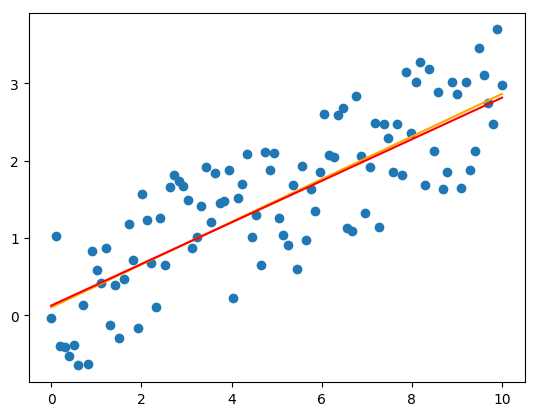

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f06bf5aa630>

In [47]:
plot(X, Y, "o")
plot(X, theKL[1]+theKL[2]*X, "orange")
plot(X, xlin[3]+xlin[4]*X, "red")
# plot(X, thebis[1]+thebis[2]*X, "black")
# plot(X, a+b*X, "green")